In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pydotplus
from IPython.display import Image

In [3]:
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# I will use these features
features = ["Pregnancies", "Insulin", "BMI", "Age", "Glucose", "BloodPressure", "DiabetesPedigreeFunction"]
x = df[features]
y = df.Outcome

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.head())

     Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure  \
88            15      110  37.1   43      136             70   
467            0      100  36.8   25       97             64   
550            1        0  27.4   21      116             70   
147            2      119  30.5   34      106             64   
481            0        0  35.2   29      123             88   

     DiabetesPedigreeFunction  
88                      0.153  
467                     0.600  
550                     0.204  
147                     1.400  
481                     0.197  


In [6]:
# This is a classification problem. I could also use Logistic Regression. I will use the Decision Tree.

clsfr = DecisionTreeClassifier() # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred_prob))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))

[[113  33]
 [ 44  41]]
Accuracy: 0.6666666666666666
Auc Score: 0.6666666666666666
Precission: 0.5540540540540541
Recall: 0.4823529411764706
F1 Score: 0.5157232704402517


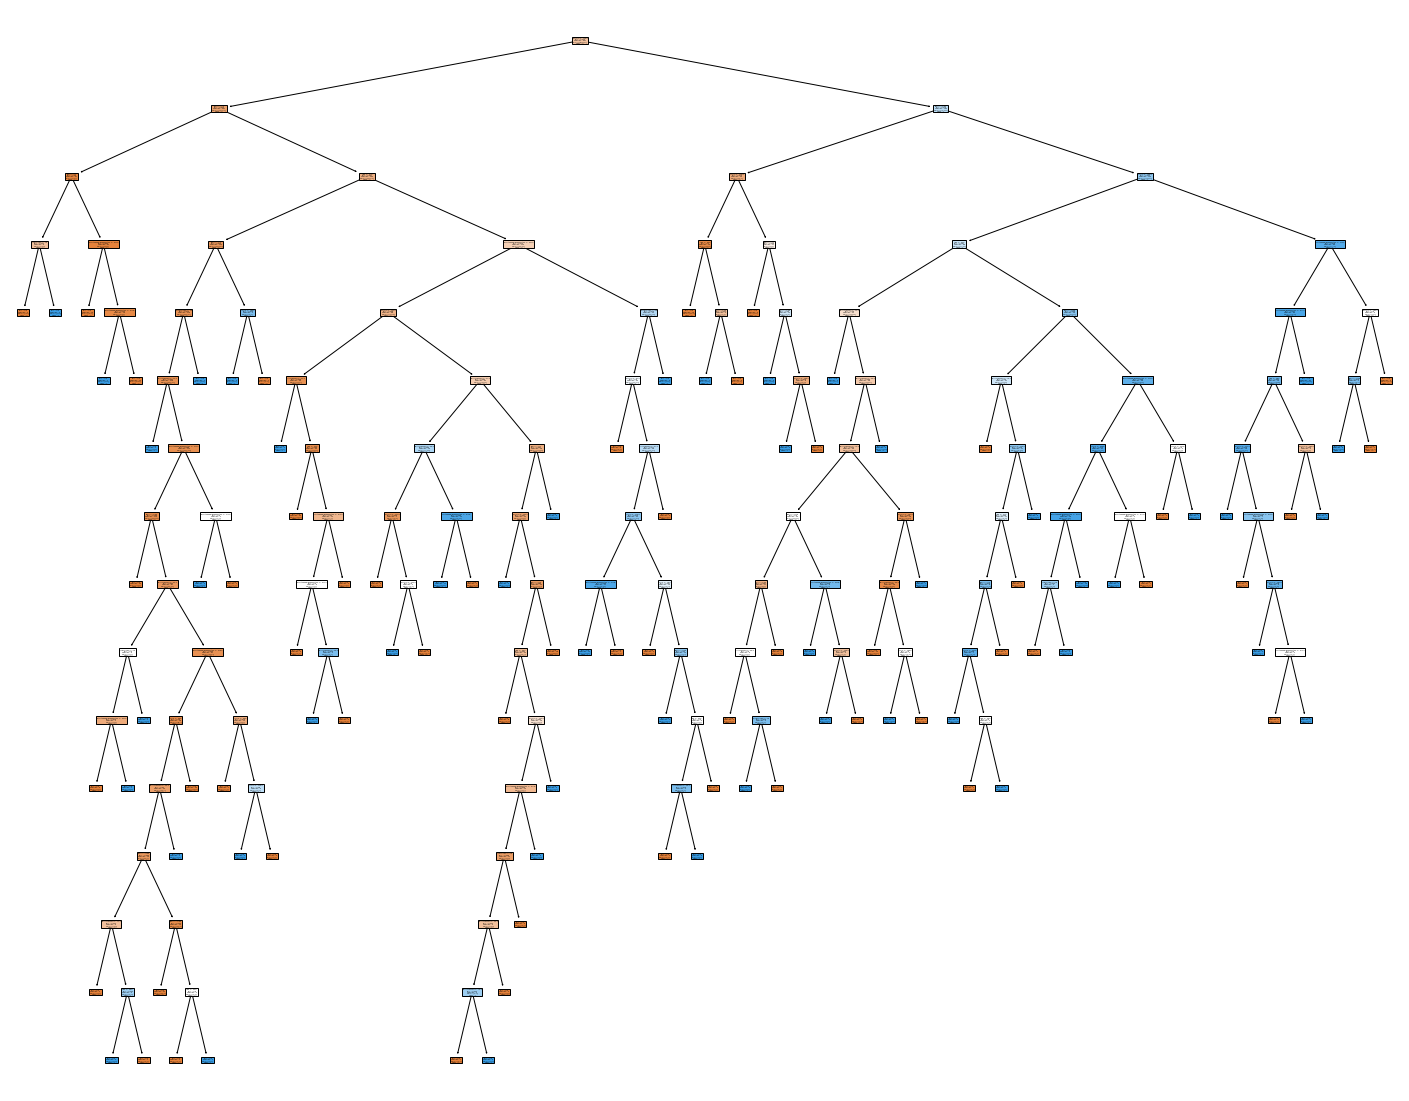

In [7]:
# Plot Method 1   (Matplotlib)
fig = plt.figure(figsize=(25, 20))
a = tree.plot_tree(clsfr, feature_names=features, class_names=["0", "1"], filled=True)

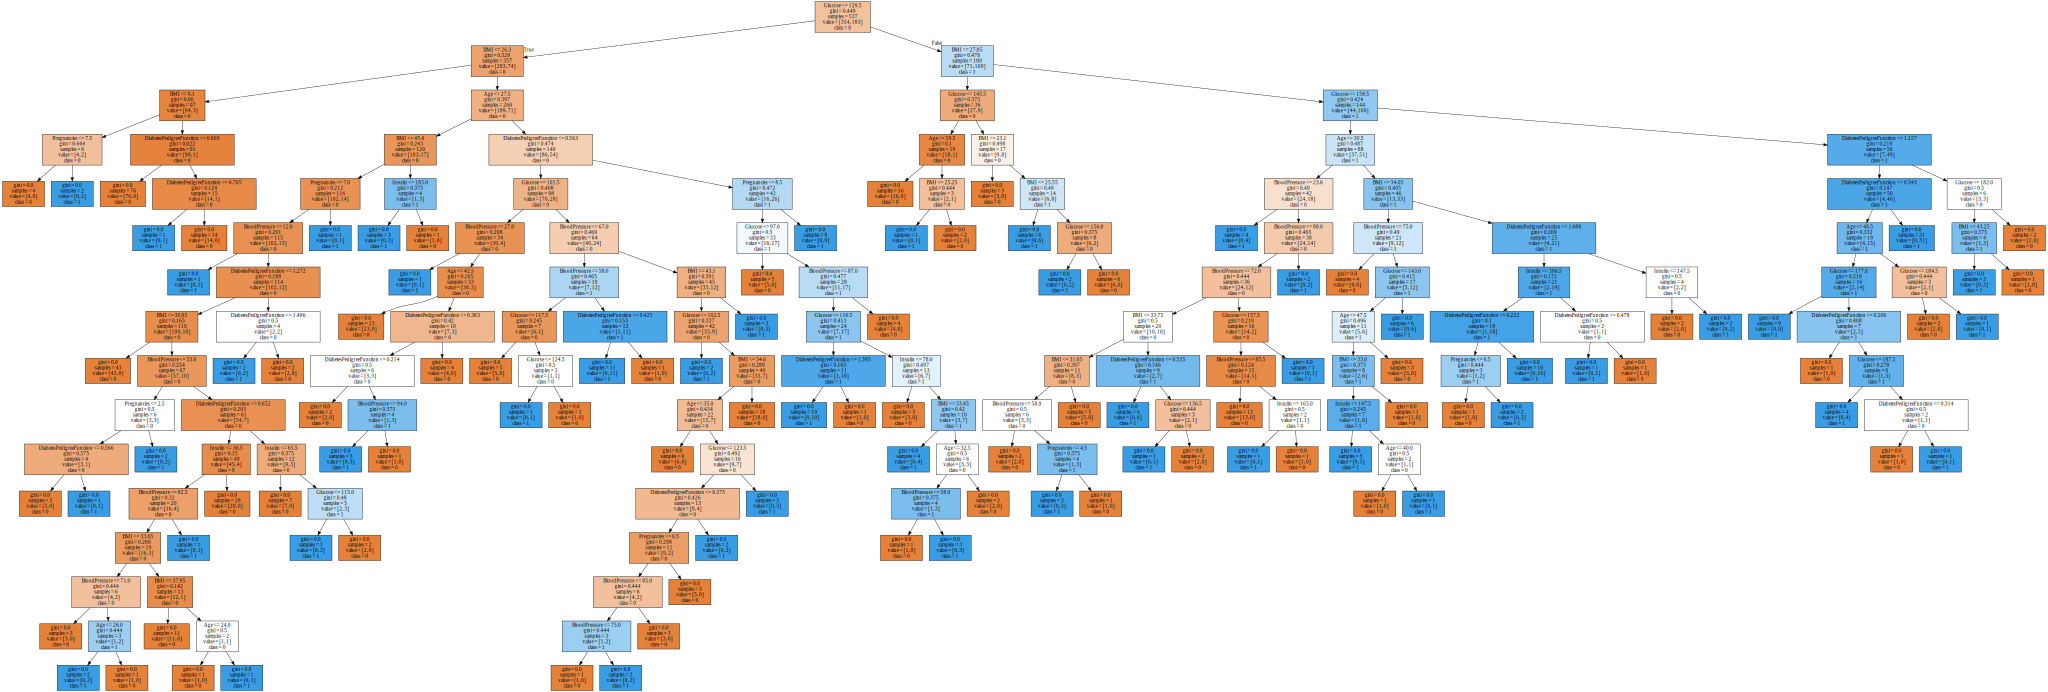

In [8]:
# Plot Method 2  (Graphviz)
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True)
graph = graphviz.Source(dot_dat, format="png")
graph

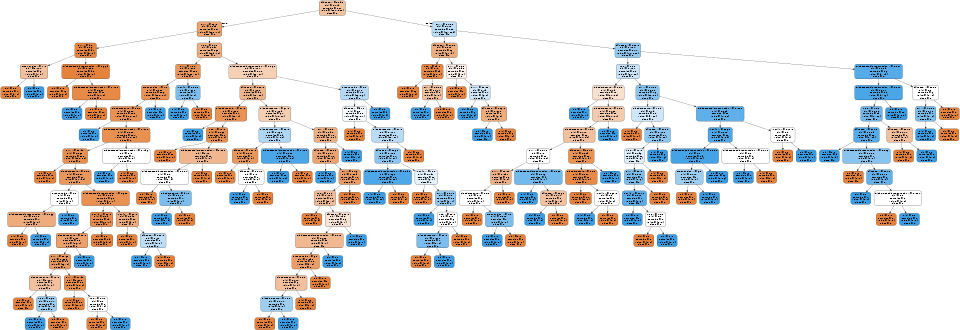

In [9]:


dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True,
                              rounded=True)

pydot_grp = pydotplus.graph_from_dot_data(dot_dat)
pydot_grp.write_png("orginal_tree.png")
pydot_grp.set_size("10, 10!")
Image(pydot_grp.create_png())

In [10]:
clsfr = DecisionTreeClassifier(max_depth=4) # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))
# Apparently I overfitted before

[[124  22]
 [ 31  54]]
Accuracy: 0.7705627705627706
Auc Score: 0.7705627705627706
Precission: 0.7105263157894737
Recall: 0.6352941176470588
F1 Score: 0.6708074534161491


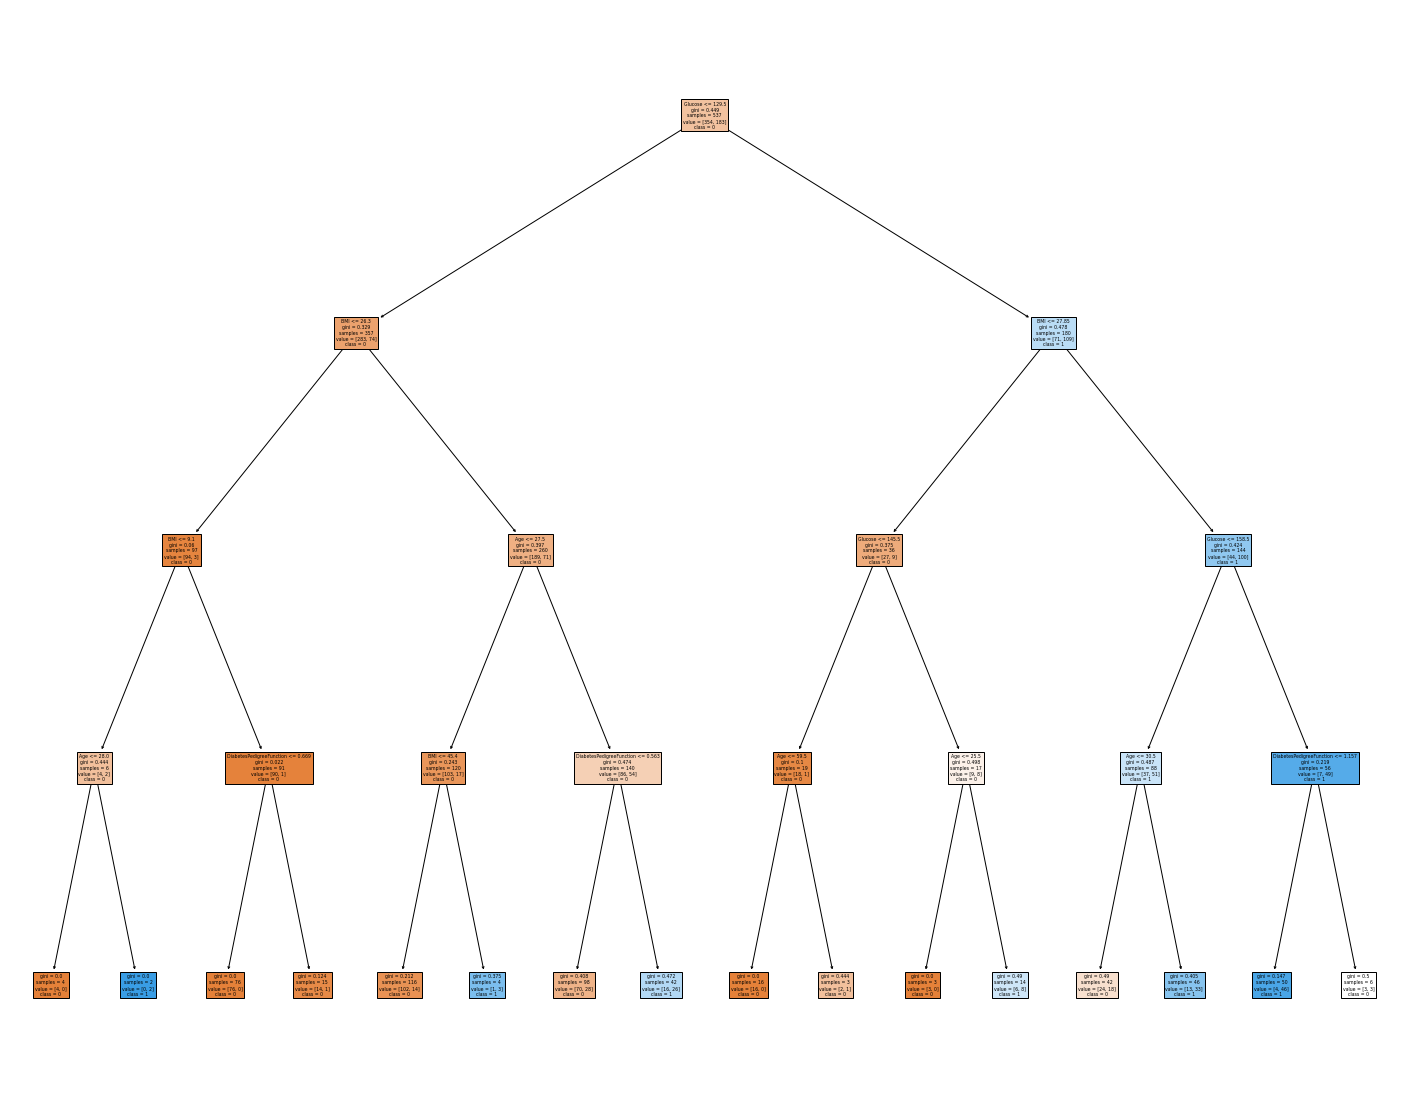

In [11]:
# Plot Method 1   (Matplotlib)
fig = plt.figure(figsize=(25, 20))
a = tree.plot_tree(clsfr, feature_names=features, class_names=["0", "1"], filled=True)

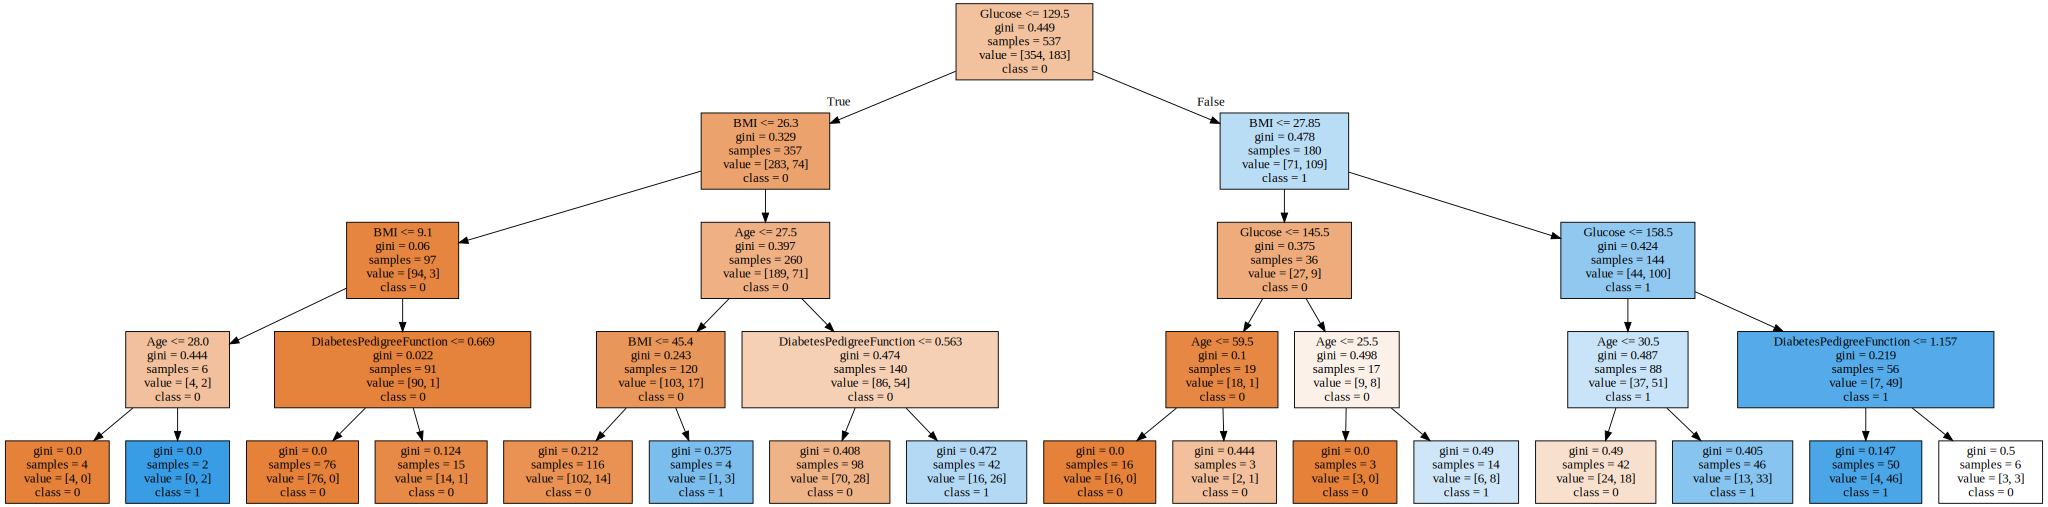

In [12]:
# Plot Method 2  (Graphviz)
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True)
graph = graphviz.Source(dot_dat, format="png")
graph

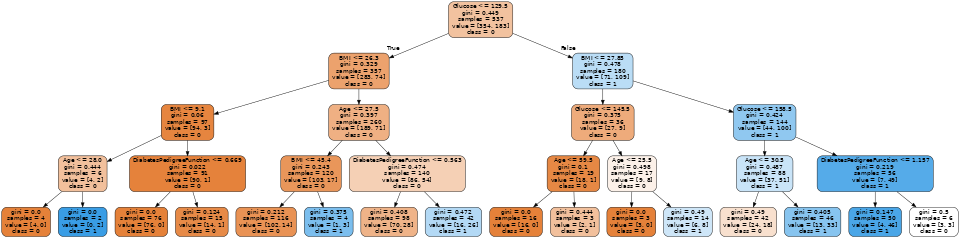

In [13]:
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True,
                              rounded=True)

pydot_grp = pydotplus.graph_from_dot_data(dot_dat)
pydot_grp.write_png("orginal_tree.png")
pydot_grp.set_size("10, 10!")
Image(pydot_grp.create_png())

In [14]:
clsfr = DecisionTreeClassifier(max_depth=2) # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))
# Significant metrics decreased. Depth value of 2 made my model underfit.

[[127  19]
 [ 37  48]]
Accuracy: 0.7575757575757576
Auc Score: 0.7575757575757576
Precission: 0.7164179104477612
Recall: 0.5647058823529412
F1 Score: 0.631578947368421


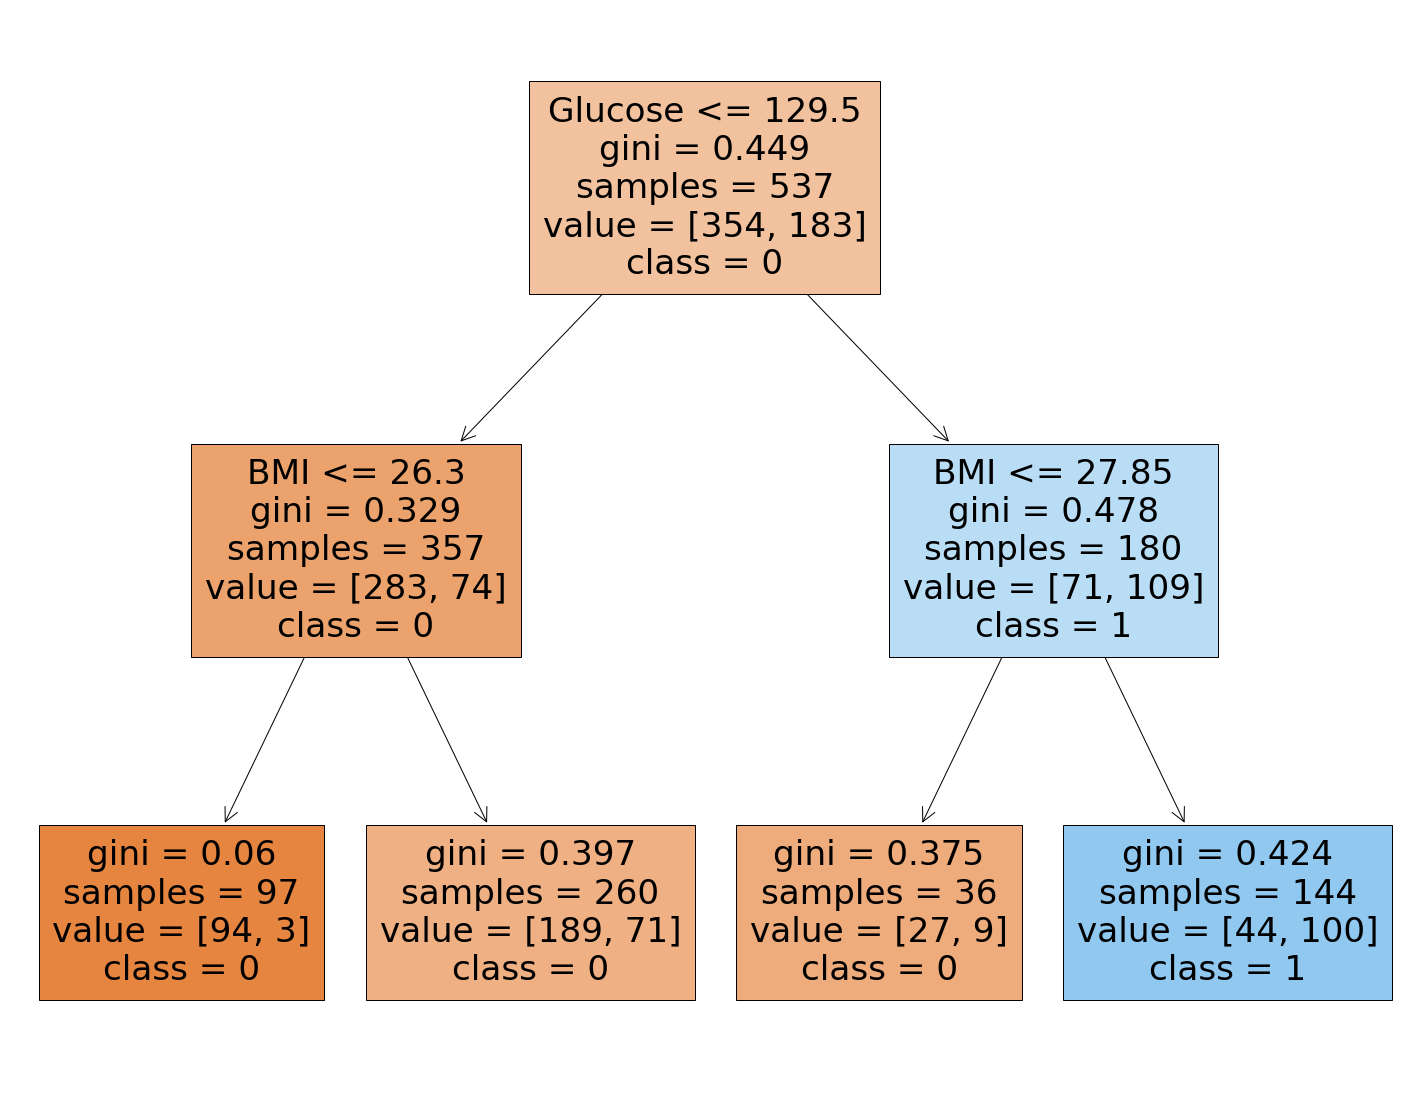

In [15]:
# Plot Method 1   (Matplotlib)
fig = plt.figure(figsize=(25, 20))
a = tree.plot_tree(clsfr, feature_names=features, class_names=["0", "1"], filled=True)

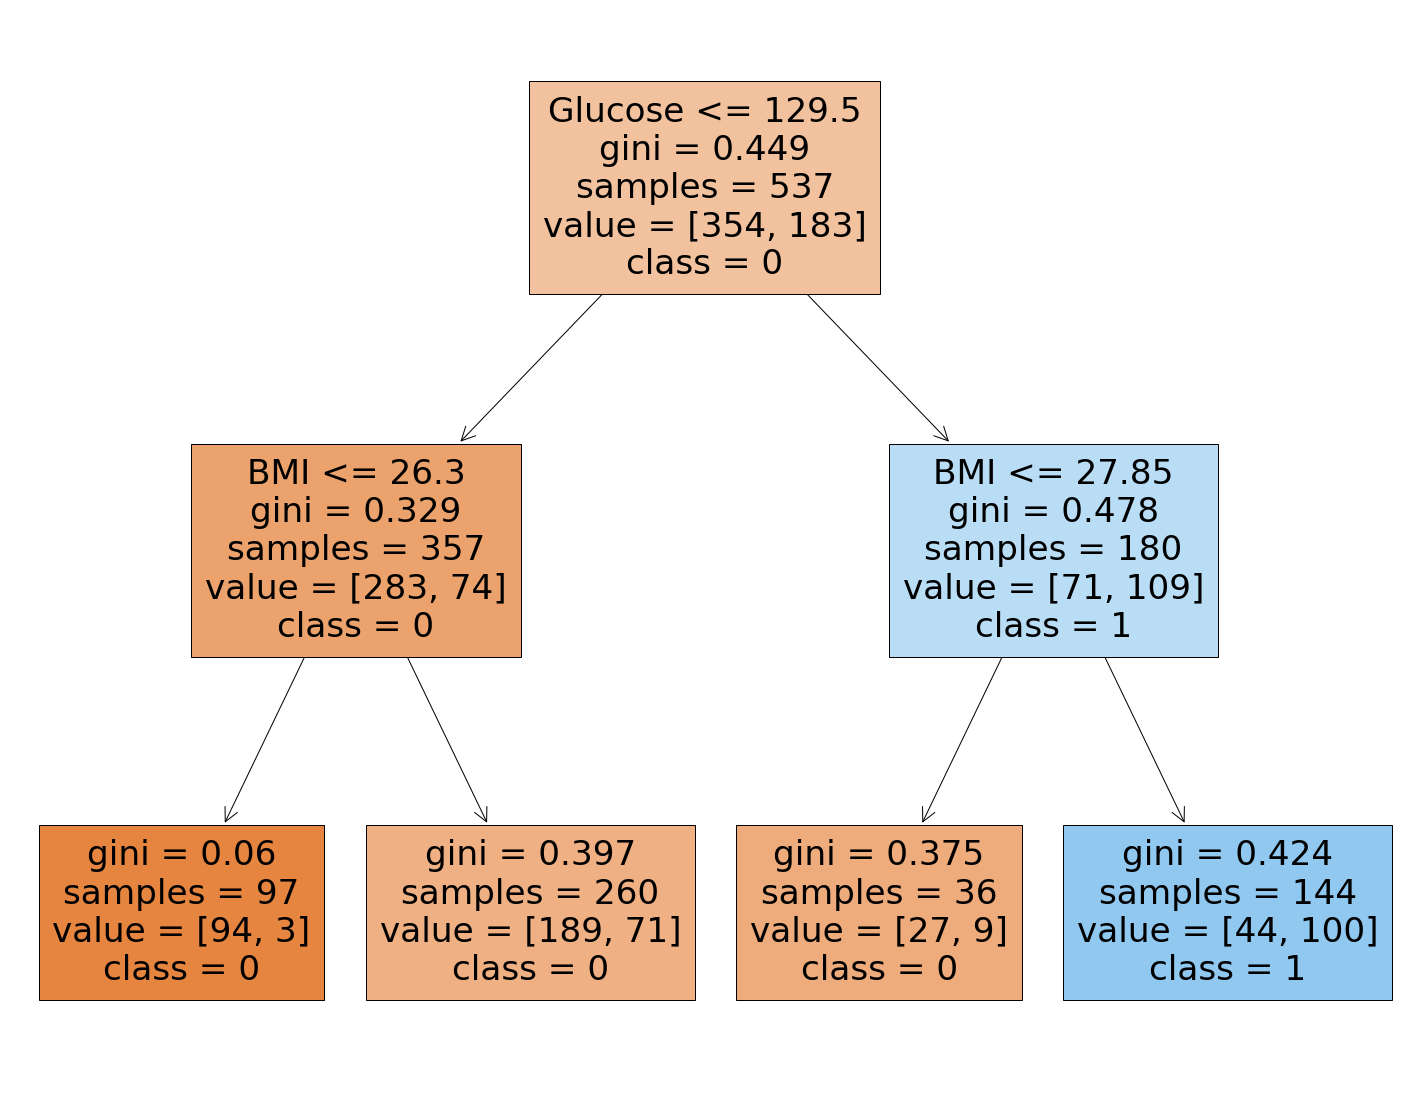

In [16]:
# Plot Method 1   (Matplotlib)
fig = plt.figure(figsize=(25, 20))
a = tree.plot_tree(clsfr, feature_names=features, class_names=["0", "1"], filled=True)

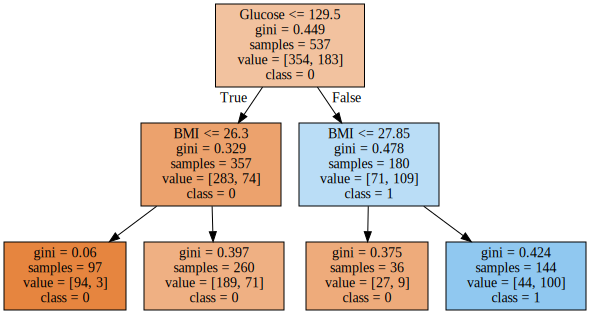

In [17]:
# Plot Method 2  (Graphviz)
dot_dat = tree.export_graphviz(clsfr, out_file=None, feature_names=features, class_names=["0", "1"], filled=True)
graph = graphviz.Source(dot_dat, format="png")
graph

In [18]:
clsfr = DecisionTreeClassifier(max_depth=4) # object
clsfr =clsfr.fit(x_train, y_train)

pred = clsfr.predict(x_test)
pred_prob = clsfr.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, pred))
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Auc Score:", metrics.accuracy_score(y_test, pred))
print("Precission:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))
print("F1 Score:", metrics.f1_score(y_test, pred))

[[124  22]
 [ 31  54]]
Accuracy: 0.7705627705627706
Auc Score: 0.7705627705627706
Precission: 0.7105263157894737
Recall: 0.6352941176470588
F1 Score: 0.6708074534161491


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


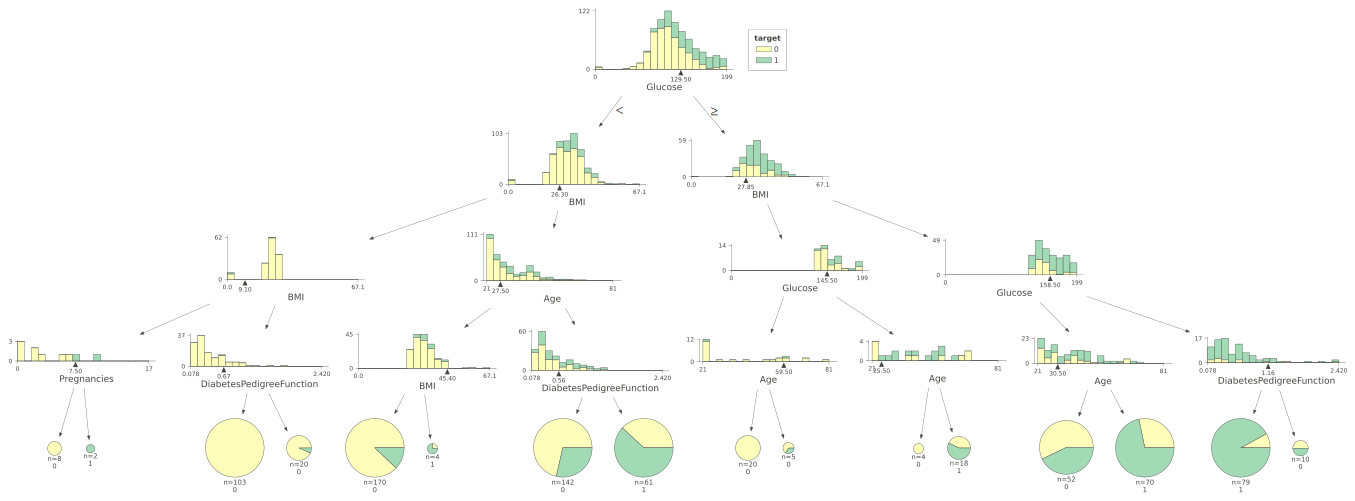

In [19]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clsfr, x, y, target_name="target", feature_names=features, class_names=["0", "1"])
viz